Julia Żóltowska 
Klasyfikacja Pasażerów Titanica - Wykorzystanie Klasyfikatora Nainwego Bayesa i Regresji Logistycznej 

Opis Danych
Variable Description

* **PassengerId:** unique id number to each passenger  
* **Survived:** passenger survive(1) or died(0)
* **Pclass:** passenger class 
* **Name:** name
* **Sex:** sex
* **Age:** age of passenger  
* **SibSp:** number of siblings/spouses  
* **Parch:** number of parents/children  
* **Ticket:** ticket number  
* **Fare:** amount of money spent on ticket  
* **Cabin:** cabin category 
* **Embarked:** port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton) 



















In [ ]:
import pandas as pd
import numpy as np
import sklearn as sc
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
data = pd.read_csv("/content/drive/MyDrive/EWD Projekt/Titanic-Dataset (2).csv")

Wczytujemy dane

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **WSTEPNA OCENA DANYCH**

Wypisujemy nazwy kolumn

In [ ]:
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Teraz możemy okreslić, które jakiego rodzaju mamy atrybuty:
*   Categorical: Survied, Sex, Embarked, Pclass(Ordinal)
*   Numerical: Age,Fare, SibSp(Discrete), Parch(Discrete)



Sprawdzamy, gdzie mogą wystąpić potencjalne błędy

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Wnioski: Występują dane numeryczne i aphanumeryczne. 
Istotna uwaga, Ticket jest w formie mix numerycznych danych i alfanumercznych, natomiast Cabin jest w podstaci alfanumerczynej.Dodatkowo nalezy zwrócić uwagę, na kolumnę Name, w której może występować dużo błędów, literówek czy np. nawiasy okrągłe oraz cudzysłowy stosowane do np. nazw alternatywnych.

Sprawdzamy, w których kolumnach występują brakujące wartości

In [ ]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Wnioski: Brakuje wartości w kolumnach: Age, Cabin i Embarked

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Distribution of numerical feature values

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Distribution of categorical features


In [ ]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Zestawienie kto z jakiej klasy przeżył

In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Zestawienie kto z jakiej płci przeżyło więcej pasażerów

In [ ]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Wizualizacja zmiennych, które będą wykorzystane w przyszłości

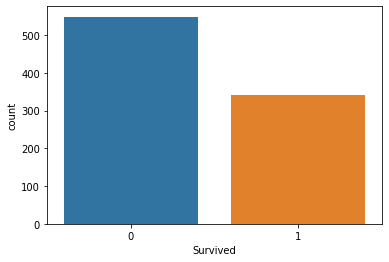

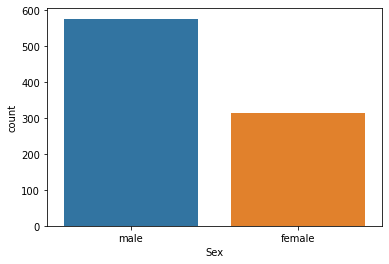

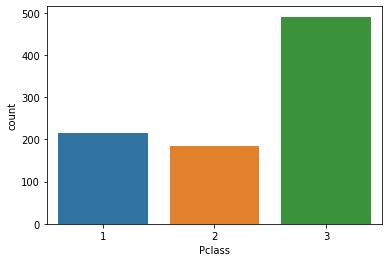

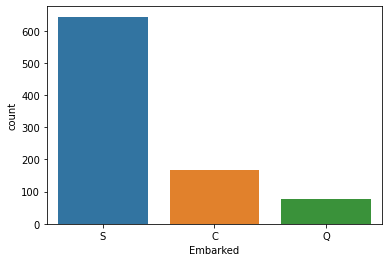

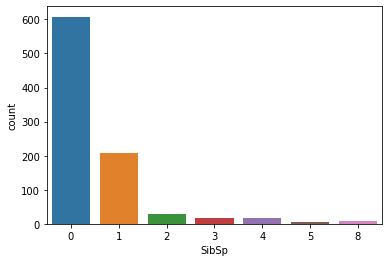

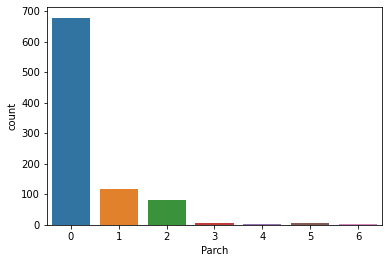

In [ ]:
def wykres(feature):    
    # visualize
    sns.countplot(x=feature,data=data)
    plt.show()
    print("\n\n")
    
categories = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for x in categories:
    wykres(x)

## **PRZYGOTOWANIE DANYCH DO MODELOWANIA**

In [ ]:
train, test = train_test_split(data, test_size=0.3)

In [ ]:
train.to_csv('train_data_titanic', index=False)
test.to_csv('test_data_titanic', index=False)

In [ ]:
columns_names=["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin\t","Embarked"]
titanic_training=pd.read_csv("/content/train_data_titanic", header=None, names=columns_names,skiprows=1,na_values=[" "], sep =',')
titanic_test=pd.read_csv("/content/test_data_titanic", header=None, names=columns_names, skiprows=1,na_values=[" "], sep=',')

In [ ]:
titanic_training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin\t,Embarked
0,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
1,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
2,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
3,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
4,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
...,...,...,...,...,...,...,...,...,...,...,...,...
618,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
619,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
620,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
621,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [ ]:
titanic_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin\t,Embarked
0,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
1,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
2,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
3,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
4,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
263,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C
264,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,NaN,S
265,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
266,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S


Bardzo dużo brakujących wartości w kolumnie Cabin\t zarówno w zbiorze treningowym jak i testowym, co wynika z wstępnej oceny danych

In [ ]:
titanic_training['Cabin\t'].isna().sum()

487

In [ ]:
titanic_test['Cabin\t'].isna().sum()

200

Wniosek: Należy usunąć kolumnę Cabin\t

Wniosek: Kolumny: PassengerId, Name i Ticket są kolumnami z wartościami uniklanymi i się nie przydzadzą.

Usuwamy je ze zbioru treningowego

In [ ]:
titanic_training.drop(['Cabin\t','PassengerId','Name', 'Ticket'],axis=1, inplace=True)

Usuwamy z testowego zbioru

In [ ]:
titanic_test.drop(['Cabin\t','PassengerId','Name', 'Ticket'],axis=1, inplace=True)

Sprawdzamy jak wyglądają kolumny w zbiorze treningowym oraz testowym

In [ ]:
titanic_training.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
titanic_test.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Sprawdzenie, w których kolumnach znajdują się braki w danych treningowych

In [ ]:
titanic_training.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [ ]:
titanic_training['Age'].isna().sum()

126

In [ ]:
titanic_training['Embarked'].isna().sum()

2

Dla danych treningowych widzimy, że brakuje wartości w kolumnach: Age i Embarked 

In [ ]:
titanic_test.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
titanic_test['Age'].isna().sum()

51

Dla danych testowych brakuje wartości w kolumnie Age 

# **Wstępne** **przetwarzanie**

Uzupełnianie brakujących wartości dla danych treningowych- kolumna Age i Embarked. 

In [ ]:
# dla wieku w danych treningowych uzupełniamy braki średnią wieku z danej Pclass
titanic_training.loc[titanic_training.Age.isna(), 'Age'] = titanic_training[~titanic_training.Age.isna()].Age.mean()

In [ ]:
#w przypadku kolumny Embarked brakuje tylko 2 wartości więc uzupełnimy je modą
titanic_training["Embarked"] = titanic_training["Embarked"].fillna(titanic_training["Embarked"].mode()[0])

Uzupełniamy brakujące wartości dla testowego zbioru - kolumna Age 

In [ ]:
# dla wieku w danych testowych uzupełniamy braki średnią wieku z danej Pclass
titanic_test.loc[titanic_test.Age.isna(), 'Age'] = titanic_test[~titanic_test.Age.isna()].Age.mean()

Sprawdzamy czy nadal są jakieś brakujące wartości zarówno w zbiorze treningowym oraz testowym

In [ ]:
titanic_training.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
titanic_test.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

Sprawdzenie unikalnych wartości w wybranych kolumnach

In [ ]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  623 non-null    int64  
 1   Pclass    623 non-null    int64  
 2   Sex       623 non-null    object 
 3   Age       623 non-null    float64
 4   SibSp     623 non-null    int64  
 5   Parch     623 non-null    int64  
 6   Fare      623 non-null    float64
 7   Embarked  623 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 39.1+ KB


In [ ]:
for col in titanic_training.columns:
  print(col)
  print(pd.unique(titanic_training[col]))

Survived
[1 0]
Pclass
[3 1 2]
Sex
['female' 'male']
Age
[29.49714286 35.         33.         17.         23.         30.
 22.         25.         26.         18.         19.         34.
 24.         29.         27.         61.         58.         16.
 20.         71.         45.         21.         56.         80.
  4.         42.         39.         40.         38.         15.
 45.5        62.         36.         43.         44.         32.
 49.         28.          8.          7.         51.         63.
  2.         10.         50.          5.         54.          3.
 70.         11.         31.         41.         13.          6.
 28.5        48.         52.         32.5        47.         66.
 37.         57.         34.5        65.         46.         14.
  0.83       74.         40.5        59.          0.67        0.75
 53.          1.          9.         30.5        36.5        23.5
 55.         12.         60.        ]
SibSp
[1 0 3 2 4 5 8]
Parch
[0 2 1 5 3 4]
Fare
[ 24.15    

In [ ]:
for col in titanic_test.columns:
  print(col)
  print(pd.unique(titanic_test[col]))

Survived
[0 1]
Pclass
[2 1 3]
Sex
['male' 'female']
Age
[25.         40.         22.         21.         24.          7.
 50.         30.16170507 36.         30.         49.         16.
 26.         19.         29.         37.         58.         56.
 39.         28.         45.         32.          9.         54.
 31.         64.         27.          1.         55.5        35.
 61.         43.         20.         47.         57.         34.
 23.         52.         38.         18.         33.         14.
 60.         65.          0.42       48.          0.92       44.
 24.5         5.          2.          4.         20.5        14.5
 51.         30.5         0.75       62.         42.         17.
 70.5        41.         15.          3.        ]
SibSp
[1 0 4 3 2 8 5]
Parch
[0 1 2 5 4 3 6]
Fare
[ 26.       0.       8.05     7.75    16.1     29.125    7.05     8.1125
  13.      27.75    25.9292  14.4542  10.5      7.25    52.5542 113.275
  56.4958  35.5     27.7208  31.275   14.4    164

# **Przygotowane danych do Naiwnego Bayesa**

In [ ]:
#zaokrąglamy Age do calosci
titanic_training = titanic_training.astype({'Age':'int'})
print(titanic_training.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [ ]:
titanic_training['Age'].unique()

array([29, 35, 33, 17, 23, 30, 22, 25, 26, 18, 19, 34, 24, 27, 61, 58, 16,
       20, 71, 45, 21, 56, 80,  4, 42, 39, 40, 38, 15, 62, 36, 43, 44, 32,
       49, 28,  8,  7, 51, 63,  2, 10, 50,  5, 54,  3, 70, 11, 31, 41, 13,
        6, 48, 52, 47, 66, 37, 57, 65, 46, 14,  0, 74, 59, 53,  1,  9, 55,
       12, 60])

To samo działanie robimy dla zbioru testowego

In [ ]:
#zaokrąglamy Age do calosci
titanic_test = titanic_test.astype({'Age':'int'})
print(titanic_test.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [ ]:
titanic_test['Age'].unique()

array([25, 40, 22, 21, 24,  7, 50, 30, 36, 49, 16, 26, 19, 29, 37, 58, 56,
       39, 28, 45, 32,  9, 54, 31, 64, 27,  1, 55, 35, 61, 43, 20, 47, 57,
       34, 23, 52, 38, 18, 33, 14, 60, 65,  0, 48, 44,  5,  2,  4, 51, 62,
       42, 17, 70, 41, 15,  3])

Także kolumnę Fare zmieniamy z float na integer

In [ ]:
titanic_training = titanic_training.astype({'Fare':'int'})
print(titanic_training.dtypes)

Survived     int64
Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked    object
dtype: object


In [ ]:
titanic_test= titanic_test.astype({'Fare':'int'})
print(titanic_test.dtypes)

Survived     int64
Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked    object
dtype: object


# **Dyskretyzacja** **atrybutów** **numerycznych**

Tworzymy przedziały dla: 
*   Age
*   SibSp(Number of siblings/spouses aboard the Titanic
*   Parch(number of parents/children aboard the titanic)
*   Fare (Passenger fare)
w zbiorze treningowym oraz testowym.

In [ ]:
# Tworzymy przedziały dla Age i danych treningowych
data=[titanic_training]
for d in data:
    d['Age'] = d['Age'].astype(int)
    d.loc[ d['Age'] <= 10, 'Age'] = 0
    d.loc[(d['Age'] > 10) & (d['Age'] <= 18), 'Age'] = 1
    d.loc[(d['Age'] > 18) & (d['Age'] <= 25), 'Age'] = 2
    d.loc[(d['Age'] > 25) & (d['Age'] <= 30), 'Age'] = 3
    d.loc[(d['Age'] > 30) & (d['Age'] <= 35), 'Age'] = 4
    d.loc[(d['Age'] > 35) & (d['Age'] <= 40), 'Age'] = 5
    d.loc[(d['Age'] > 40) & (d['Age'] <= 65), 'Age'] = 6
    d.loc[ d['Age'] > 65, 'Age'] = 6

In [ ]:
# Tworzymy przedziały dla Age i danych testowych
data=[titanic_test]
for d in data:
    d['Age'] = d['Age'].astype(int)
    d.loc[ d['Age'] <= 10, 'Age'] = 0
    d.loc[(d['Age'] > 10) & (d['Age'] <= 18), 'Age'] = 1
    d.loc[(d['Age'] > 18) & (d['Age'] <= 25), 'Age'] = 2
    d.loc[(d['Age'] > 25) & (d['Age'] <= 30), 'Age'] = 3
    d.loc[(d['Age'] > 30) & (d['Age'] <= 35), 'Age'] = 4
    d.loc[(d['Age'] > 35) & (d['Age'] <= 40), 'Age'] = 5
    d.loc[(d['Age'] > 40) & (d['Age'] <= 65), 'Age'] = 6
    d.loc[ d['Age'] > 65, 'Age'] = 6

In [ ]:
# Tworzymy przedziały dla Fare i danych treningowych
data = [titanic_training]
for d in data:
    d.loc[ d['Fare'] <= 8, 'Fare'] = 0
    d.loc[(d['Fare'] > 8) & (d['Fare'] <= 15), 'Fare'] = 1
    d.loc[(d['Fare'] > 15) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare']   = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare']   = 4
    d.loc[ d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)


In [ ]:
# Tworzymy przedziały dla Fare i danych testowych
data = [titanic_test]
for d in data:
    d.loc[ d['Fare'] <= 8, 'Fare'] = 0
    d.loc[(d['Fare'] > 8) & (d['Fare'] <= 15), 'Fare'] = 1
    d.loc[(d['Fare'] > 15) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare']   = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare']   = 4
    d.loc[ d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)


In [ ]:
# Tworzymy przedziały dla SibSp i danych treningowych
data = [titanic_training]
for d in data:
    d.loc[ d['SibSp'] <= 0, 'SibSp'] = 0
    d.loc[(d['SibSp'] > 0) & (d['SibSp'] <= 2), 'SibSp'] = 1
    d.loc[(d['SibSp'] > 2) & (d['SibSp'] <= 4), 'SibSp']   = 2
    d.loc[(d['SibSp'] > 4) & (d['SibSp'] <= 6), 'SibSp']   = 3
    d.loc[(d['SibSp'] > 6) & (d['SibSp'] <= 8), 'SibSp']   = 4
    d['SibSp'] = d['SibSp'].astype(int)

In [ ]:
# Tworzymy przedziały dla SibSp i danych testowych
data = [titanic_test]
for d in data:
    d.loc[ d['SibSp'] <= 0, 'SibSp'] = 0
    d.loc[(d['SibSp'] > 0) & (d['SibSp'] <= 2), 'SibSp'] = 1
    d.loc[(d['SibSp'] > 2) & (d['SibSp'] <= 4), 'SibSp']   = 2
    d.loc[(d['SibSp'] > 4) & (d['SibSp'] <= 6), 'SibSp']   = 3
    d.loc[(d['SibSp'] > 6) & (d['SibSp'] <= 8), 'SibSp']   = 4
    d['SibSp'] = d['SibSp'].astype(int)

In [ ]:
# Tworzymy przedziały dla  Parch i danych treningowych
data = [titanic_training]
for d in data:
    d.loc[ d['Parch'] <= 0, 'Parch'] = 0
    d.loc[(d['Parch'] > 0) & (d['Parch'] <= 2), 'Parch'] = 1
    d.loc[(d['Parch'] > 2) & (d['Parch'] <= 4), 'Parch']   = 2
    d.loc[(d['Parch'] > 4) & (d['Parch'] <= 6), 'Parch']   = 3
    d.loc[(d['Parch'] > 6) & (d['Parch'] <= 8), 'Parch']   = 4
    d['Parch'] = d['Parch'].astype(int)

In [ ]:
# Tworzymy przedziały dla  Parch i danych testowych
data = [titanic_test]
for d in data:
    d.loc[ d['Parch'] <= 0, 'Parch'] = 0
    d.loc[(d['Parch'] > 0) & (d['Parch'] <= 2), 'Parch'] = 1
    d.loc[(d['Parch'] > 2) & (d['Parch'] <= 4), 'Parch']   = 2
    d.loc[(d['Parch'] > 4) & (d['Parch'] <= 6), 'Parch']   = 3
    d.loc[(d['Parch'] > 6) & (d['Parch'] <= 8), 'Parch']   = 4
    d['Parch'] = d['Parch'].astype(int)

In [ ]:
titanic_training=titanic_training[['Pclass','Sex', 'Age','SibSp','Parch','Fare','Embarked','Survived']]

In [ ]:
titanic_training

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,female,3,1,0,2,Q,1
1,3,male,3,0,0,0,C,0
2,1,male,4,0,0,5,C,1
3,1,female,4,0,0,3,S,1
4,1,male,1,0,1,4,C,1
...,...,...,...,...,...,...,...,...
618,3,male,2,0,0,0,S,0
619,3,male,3,1,0,1,S,0
620,2,female,6,0,0,1,S,1
621,2,female,3,1,0,2,C,1


In [ ]:
titanic_test=titanic_test[['Pclass','Sex', 'Age','SibSp','Parch','Fare','Embarked','Survived']]

**Podział na cechy i atrybuty decyzyjne**

In [ ]:
X=titanic_training.iloc[:,:-1]
y=titanic_training.iloc[:,-1]

X_test=titanic_test.iloc[:,:-1]
y_test=titanic_test.iloc[:,-1]

X.head(), y.head()

(   Pclass     Sex  Age  SibSp  Parch  Fare Embarked
 0       3  female    3      1      0     2        Q
 1       3    male    3      0      0     0        C
 2       1    male    4      0      0     5        C
 3       1  female    4      0      0     3        S
 4       1    male    1      0      1     4        C, 0    1
 1    0
 2    1
 3    1
 4    1
 Name: Survived, dtype: int64)

In [ ]:
X_test.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

**Kodowanie atrybutów kategorycznych**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(X)


X=enc.transform(X)
X_test=enc.transform(X_test)

In [ ]:
X

array([[2., 0., 3., ..., 0., 2., 1.],
       [2., 1., 3., ..., 0., 0., 0.],
       [0., 1., 4., ..., 0., 5., 0.],
       ...,
       [1., 0., 6., ..., 0., 1., 2.],
       [1., 0., 3., ..., 0., 2., 0.],
       [2., 1., 3., ..., 0., 1., 0.]])

In [ ]:
enc.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5]),
 array(['C', 'Q', 'S'], dtype=object)]

# **Klasyfikator Naiwnego Bayesa - Modelowanie**

In [ ]:
#Bayes
from sklearn.naive_bayes import CategoricalNB
import numpy as np

clf = CategoricalNB()
clf.fit(X, y)

CategoricalNB()

In [ ]:
#Normalizacja
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [ ]:
predicted=clf.predict(X_test)
predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1])

In [ ]:
pred_proba=clf.predict_proba(X_test)
pred_proba

array([[0.6912475 , 0.3087525 ],
       [0.6912475 , 0.3087525 ],
       [0.82301212, 0.17698788],
       [0.13383242, 0.86616758],
       [0.82301212, 0.17698788],
       [0.68615075, 0.31384925],
       [0.90810067, 0.09189933],
       [0.82301212, 0.17698788],
       [0.82301212, 0.17698788],
       [0.13661232, 0.86338768],
       [0.51281041, 0.48718959],
       [0.25162866, 0.74837134],
       [0.82301212, 0.17698788],
       [0.68615075, 0.31384925],
       [0.13661232, 0.86338768],
       [0.6912475 , 0.3087525 ],
       [0.82301212, 0.17698788],
       [0.6912475 , 0.3087525 ],
       [0.69104828, 0.30895172],
       [0.6912475 , 0.3087525 ],
       [0.82301212, 0.17698788],
       [0.6912475 , 0.3087525 ],
       [0.69104828, 0.30895172],
       [0.51281041, 0.48718959],
       [0.65765241, 0.34234759],
       [0.24735205, 0.75264795],
       [0.6912475 , 0.3087525 ],
       [0.25162866, 0.74837134],
       [0.6912475 , 0.3087525 ],
       [0.06924006, 0.93075994],
       [0.

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
618    0
619    0
620    1
621    1
622    0
Name: Survived, Length: 623, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
263    0
264    0
265    1
266    0
267    1
Name: Survived, Length: 268, dtype: int64

# **Klasyfikator Naiwnego Bayesa-Ewaluacja**

In [ ]:
#Ewaluacja
#macierz pomyłek, metryki dokładność precyzja, czułość, fmiara, raport klasyfikacji
clf.classes_

array([0, 1])

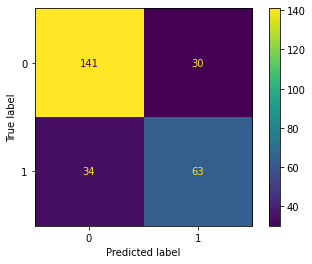

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted) #labels=["0", "1"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [ ]:
predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted, pos_label=1))
print(recall_score(y_test, predicted, pos_label=1))
print(f1_score(y_test, predicted, pos_label=1))

0.7611940298507462
0.6774193548387096
0.6494845360824743
0.6631578947368422


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted, labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       171
           1       0.68      0.65      0.66        97

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



**Wnioski:** Wyniki danego klasyfikacji dokonywanej przez dany model są dobre. 

# **Regresja logistyczna**

# **Przygotowanie danych do modelowania**

Do zastosowania regresji logistycznej potrzebujemy jako inputu liczb, dlatego proces przygotwania danych będzie się różnił.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EWD Projekt/Titanic-Dataset (2).csv")

Ponownie usuwamy kolumny, które posiadaja wartości unikalne i nie są one nam niezbędne do przewidywania czy dany pasażer przeżyje.

In [ ]:
data.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)
data.dropna(inplace=True) 

Sprawdzamy czy nadal po usunięciu kolumn są jakieś braki

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Upewniamy się, że input dla naszego modelu jest w postaci liczbowej.

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Wykorzystujemy funkcję z biblioteki pandas get_dummies() do konwersji zmiennej kategorycznej na zmienne dummy/indicator. Technika kodowania zmiennych

In [ ]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
data.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [ ]:
embark=pd.get_dummies(data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pclass=pd.get_dummies(data["Pclass"],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


Usuwamy zbędne kolumny z naszego datasetu

In [ ]:
data.drop(["Sex","Embarked","Pclass"],inplace=True, axis=1)
data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


Dodajemy nowe przez nas utworzone get_dummies varaibles do naszego datasetu

In [ ]:
data=pd.concat([data,sex,embark,pclass],axis=1)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# **Regresja** **logistyczna** - **Modelowanie**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X=data.drop("Survived",axis=1)
y=data["Survived"]

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=40)

Robimy skalowanie na zmiennych Age oraz Fare

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Min Max skalowanie
columns = [ "Age", "Fare"]
scaler = MinMaxScaler(feature_range=(0,1))
X_train[columns] = scaler.fit_transform(X_train[columns])


In [ ]:
X_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
675,0.235495,0,0,0.015176,1,0,1,0,1
276,0.604096,0,0,0.015127,0,0,1,0,1
190,0.426621,0,0,0.025374,0,0,1,1,0
44,0.249147,0,0,0.015379,0,1,0,0,1
211,0.467577,0,0,0.040989,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
555,0.836177,0,0,0.051822,1,0,1,0,0
208,0.208191,0,0,0.015127,0,1,0,0,1
8,0.358362,0,2,0.021731,0,0,1,0,1
273,0.494881,0,1,0.057971,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Min Max skalowanie
columns = [ "Age", "Fare"]
scaler = MinMaxScaler(feature_range=(0,1))
X_test[columns] = scaler.fit_transform(X_test[columns])


In [ ]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
417,0.220910,0,2,0.025374,0,0,1,1,0
513,0.673285,1,0,0.115941,0,0,0,0,0
387,0.447097,0,0,0.025374,0,0,1,1,0
234,0.296306,0,0,0.020495,1,0,1,1,0
402,0.258608,1,0,0.019177,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
252,0.773813,0,0,0.051822,1,0,1,0,0
615,0.296306,1,2,0.126872,0,0,1,1,0
212,0.271174,0,0,0.014151,1,0,1,0,1
764,0.195778,0,0,0.015176,1,0,1,0,1


In [ ]:
regresjaL=LogisticRegression(max_iter=1000, C=0.1)

In [ ]:
regresjaL.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
regresjaL.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7757009345794392

In [ ]:
print(regresjaL.score(X_test,y_test))
print(regresjaL.score(X_train,y_train))

0.7757009345794392
0.8172690763052208


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
y_pred=regresjaL.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Wyświetlamy confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[121,   9],
       [ 39,  45]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       130
           1       0.83      0.54      0.65        84

    accuracy                           0.78       214
   macro avg       0.79      0.73      0.74       214
weighted avg       0.79      0.78      0.76       214



Wnioski: Wyniki klasyfikacji dokonywanej przez dany model są także dobre.